# Population Simulation: Type 1 Diabeties
Timothy Novak and Maia Materman
The following section of code recreates the population model from the ModSim Notebooks

Saving figure to file chap04-fig01.pdf


7.6546433958074465

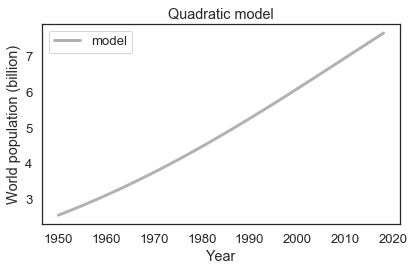

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html
def plot_results(timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """

    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

system = System(t_0=1950, 
                t_end=2018,
                p_0=2.557628654,
                alpha=0.025,
                beta=-0.0018)
results = run_simulation(system, update_func_quad)
plot_results(results, 'Quadratic model')
savefig('chap04-fig01.pdf')
results[system.t_end]

## Motivating Question
What is the percent of the population which will have type 1 diabeties in 100 years?
However, this is a little difficult to find data on so we specified the question a little.

## New Motivating Question

What is the percent population of austria which will have type 1 diabeties in 100 years?
(Because austria apparently has records on their type 1 diabetic populations relative to the rest of the world.)

## Calibrating population growth model to desired population
The population model can be hand calibrated to represent austria's population so first we need to create a population time graph of austria's population

In [2]:
#innitializes the timeseries with the population data on the Austrian population
austrian_pop = TimeSeries()
austrian_pop[1923] = 6534742
austrian_pop[1934] = 6760044
austrian_pop[1939] = 6652567
austrian_pop[1951] = 6933905
austrian_pop[1961] = 7073807
austrian_pop[1971] = 7491526
austrian_pop[1981] = 7555338
austrian_pop[1991] = 7795786
austrian_pop[1997] = 8072000
austrian_pop[2001] = 8032587
austrian_pop[2011] = 8401940
austrian_pop[2018] = 8823054

Now that we have our original data stored in a series we can scatterplot our data.

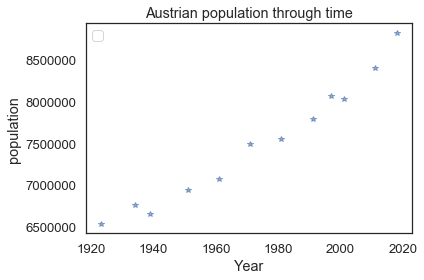

In [3]:
#plot the data
plot(austrian_pop, "*")
#decorate the plot
decorate(title = "Austrian population through time",
         xlabel = "Year",
         ylabel = "population")

Now we can add the logarithmic population growth model to the data (the logrithmic regression fit was found by hand).

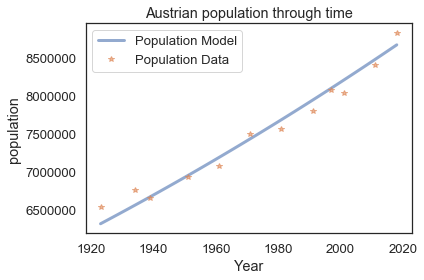

In [4]:
#this is the update function and formula from the chapter 7 notebook
def update_func_quad1(pop, t, system):
    """Compute the population next year with a quadratic model with the carrying capacity parameterization.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    #applies the model to calculate the change in population
    net_growth = pop*system.max_rate*(1- pop/system.carrying_capacity)
    #returns the new population
    return pop + net_growth

#defines a new system which holds relevant parameters for this model coifficents were found by hand
austrian_population_model_sys = System(t_0=1923, 
                t_end=2018,
                p_0=austrian_pop[1923]-220000,
                max_rate = .0041,
                carrying_capacity = 40000000)
#runs a simulation to generate model data using the values imbedded in the system
results = run_simulation(austrian_population_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plot the original population data
plot(austrian_pop, "*", label = "Population Data")
#decorate the plot
decorate(title = "Austrian population through time",
         xlabel = "Year",
         ylabel = "population")
#adds a legend to the graph
legend()

For later use we will store the equation as a function that way we can estimate population values based on the equation.

In [5]:
def Logistic_population_model (year, system):
    #This function takes in a year and parameter data and will return a population in that year based on the logistic growth model
    #returns the population in the desired year
    return system.carrying_capacity/(1+(system.carrying_capacity-system.p_0)/system.p_0*exp(-system.max_rate*year))

## Projecting the data into the future
To answer the motivating question we have to know where austria will be 100 years in the future. To estimate austrian population 100 years in the future, we can just project our newly calibrated curve 100 years into the future.

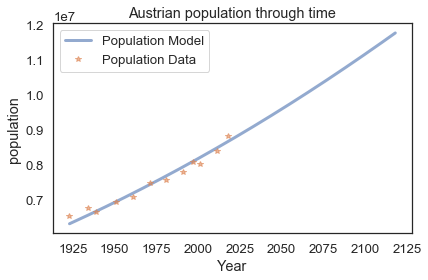

In [6]:
#defines a new system which holds relevant parameters for this model and an end date projected into the future
austrian_population_model_sys = System(t_0=1923, 
                t_end=2118,
                p_0=austrian_pop[1923]-220000,
                max_rate = .0041,
                carrying_capacity = 40000000)
#runs a simulation to generate model data using the values imbedded in the system
results = run_simulation(austrian_population_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plot the original population data
plot(austrian_pop, "*", label = "Population Data")
#decorate the plot
decorate(title = "Austrian population through time",
         xlabel = "Year",
         ylabel = "population")
#adds a legend to the graph
legend()

## Let's do it again for the population of Austrians with type 1 Diabeties
We can now take the data for the number of austrians with type 1 diabeties and fit another population curve to this data.

Here is the population data of individuals with the disorder.

In [7]:
#initializes time series which stores population data (converted into a total number of people with the sickness) of the people with the genetic disorder
sick_pop = TimeSeries()
sick_pop[1991] = austrian_pop[1991]*9/100000
sick_pop[1997] = austrian_pop[1997]*9.9/100000
sick_pop[2003] = austrian_pop[2001]*13.3/100000

We now need to plot this data

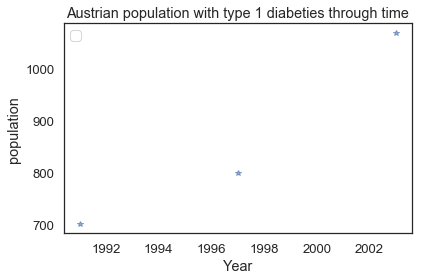

In [8]:
#plot the data
plot(sick_pop, "*")
#decorate the plot
decorate(title = "Austrian population with type 1 diabeties through time",
         xlabel = "Year",
         ylabel = "population")

Now we can fit the population curve

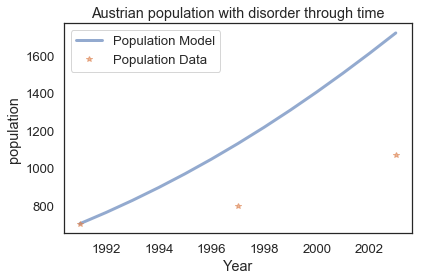

In [83]:
#defines a new system which holds relevant parameters for this model coifficents were found by hand
austrian_population_diabeties_model_sys = System(t_0=1991, 
                t_end=2003,
                p_0=sick_pop[1991],
                max_rate = .1,
                carrying_capacity = 5000)
#runs a simulation to generate model data using the values imbedded in the system
results = run_simulation(austrian_population_diabeties_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plot the original population data
plot(sick_pop, "*", label = "Population Data")
#decorate the plot
decorate(title = "Austrian population with disorder through time",
         xlabel = "Year",
         ylabel = "population")
#adds a legend to the graph
legend()

###### And project into the future to get our population with the disorder through time

In [10]:
#TODO

## Calculating the Percent of the population which is infected
Our Model Metric is the percent of the population infected with type 1 diabeties. This allows us to compress all of our analysis into one number. We can calculate this by dividing the population of infected individuals by the total population.

In [11]:
percent_sick_population = TimeSeries()
#for counter in linrange(1920,2118,1):
    #sets the value of the time series to the number of sick people divided by the total population
    #percent_sick_population[counter] = TODO

,values


Now we can plot the results over time.

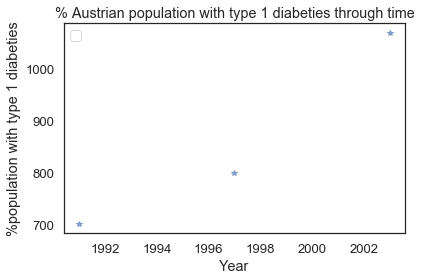

In [12]:
#plot the data
plot(sick_pop, "*")
#decorate the plot
decorate(title = "% Austrian population with type 1 diabeties through time",
         xlabel = "Year",
         ylabel = "%population with type 1 diabeties")

And we can answer our motivating question! What is the percent of the population which is infected with type 1 diabeties 100 years in the future?

In [13]:
#Find equation of best fit
#TODO
#find value at time = 2118

So we're done right? Well that was a bit boring wasn't it? So we will make another simulation which is more 'real'

## A new and Better model
For our next model we are going to simulate a population by simulating a population made of people *gasp. What I mean by this is that our new model will simulate disease propigation by breeding people/killing people each time step and keeping track of the number of infected individuals as dictated by genetic precentages for disease transmission.

### Innital conditions and System variable set up
So let's take this step by step. What are the innital conditions and system inputs?

In [14]:
#Innitialize System with various transmission precentages and innital populations of infected, carrying and non infected individuals
#system = System(initsafepop = TODO, initcarringpop = TODO, initsickpop = TODO)
#create 2d array of transmission rates
#transmission_rates = [TODO][TODO]

### Setting up the inital populations
Ok lets set up our system of people. we will take the each of the innital populations of each group and divide them each into two groups genetically males and genetically females. (the propagation rates of the disease are actually different based on gender)

In [15]:
#divide each population defined in the system by two and round to nearest number
#TODO

Ok so now we will assume a person can have one of three states:
0: A person does not have any of the transmission geens
1: A person is a carrier of the disease but does not have it themselves
2: A person is infected with the disease

We will now create an array of males and females which each contain the calculated populations of neutral, carriers, and infected people. It is important to note that because the population of Austria is quite large it is infeasable to use this approach to simulate each person individually. as a result each 'person' in our arrays is representative of one million people.

In [16]:
#Add the relevant people to the relevant arrays with each tpe being described by 0,1, or 2 as above.
#TODO

These arrays are too organized lets scramble them (this is important for later when we start accounting for deaths)

In [17]:
#scramble the arrays with .shuffle()
#TODO

### Breeding Algorithm
For each time step we will need to breed our population. so let's create a breeding algorithm. We will assume that each male has an equal chance of being paired with any female. So we will start by picking a random male and a random female.

In [18]:
#generate a random male and a random female
#TODO

Now we will mate the individuals. We assume that one person will be formed from every coupple. We then use the flip function to determine whether the child is diseased, not disseased, or a carrier according to the system percentages. we also assume that there is an equal probability of the child being either male or female.

In [19]:
#generate a child and assign a trait to it and append it to the relevant array
#TODO

Well there is our breeding portion that is the heart of this model. let's encapsulate it into a mate function

In [20]:
#encapsulate the code above into a function
#TODO

### Time Step
Now we can start making our update function which gets run every time step. At the start of our time step we want to generate a number of babies which corelates to the growth rate.

In [21]:
#make a loop which generates a number of kids by running it in proportion to the growthrate + death rate
#TODO

(A brief note on the previous code, we generate ehildren equal to the growthrate + the death rate because the growth rate is the net growthrate (born people - dead people) so we need to account for that when we make new people) This seems good, we are generating new babies, but this falls into the problem that our very first model of population tis semester fell into: it assumes a constant growth rate. so we need to write another function which retrieves a growthrate from our total austrian population model from earlier.

In [22]:
#Growth rate retrieval function
#TODO

Ok now there is just one more idea we need to account for in our time step: The people that die off. We need to kill off people in the population equal in number to what the death rate predicts.

In [23]:
#Handel Death rate
#TODO

You might notice that we are handeling these deaths in an odd way, by explicitly killing off the people from the begining of the array. This is because it creates population turn over. New babies are added to one end of the array and the other end of the array has the old die off. This then means that as a baby gets older it will get cycled through the array untill it dies at the other end.This keeps the population from becoming stagnant when the growth rate lessens towards the carrying capacity.

Well we can now calculate the percent of the population which is infected by dividing the number of infected individuals by the total population (found as the sum of males and females in the population). We can also encapsulate the function at the end of this into an update function.

In [24]:
#make percent population calculation and encapsulate update function
#TODO

### Run simulation
We can now make a pretty standard run simulation function which retuns a time series with 

In [25]:
#Run simulation function which retuns a time Series
#TODO

### Results
Ok so lets get some results. We can plot the percent population which is infected over time.

In [26]:
#Plot of percent infected over time
#TODO

We can also calculate the answer to our motivating question.

In [27]:
#calculate the answer to the motivating question
#TODO

### Comaprason of data and results
An interesting result of having made two different models is that we can compare them against each other.

In [28]:
#Comparason stuffs
#Todo

### Interpretation
Lets Interpret things!

In [29]:
#interpretation
#TODO